In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('House-Price-Prediction-clean.csv')

In [3]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
df.shape

(1460, 32)

In [5]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [7]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent


In [8]:
#Drop rows with any missing values
df.dropna(inplace=True)

In [9]:
df.shape


(1460, 32)

C:\Users\jayak\AppData\Local\Temp\ipykernel_5188\2961842802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

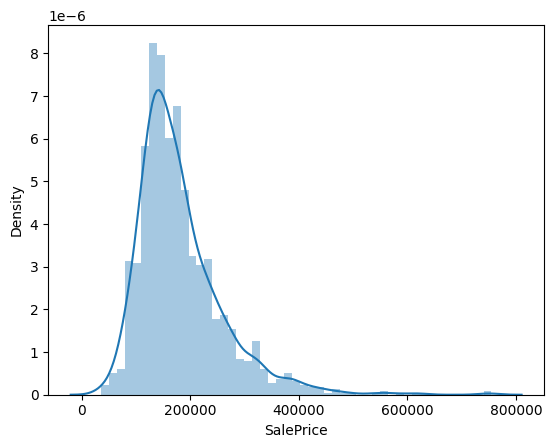

In [10]:
sns.distplot(df.SalePrice)


C:\Users\jayak\AppData\Local\Temp\ipykernel_14712\824837211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.SalePrice))
C:\Users\jayak\anaconda3\envs\tenserflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jayak\anaconda3\envs\tenserflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

<Axes: xlabel='SalePrice', ylabel='Density'>

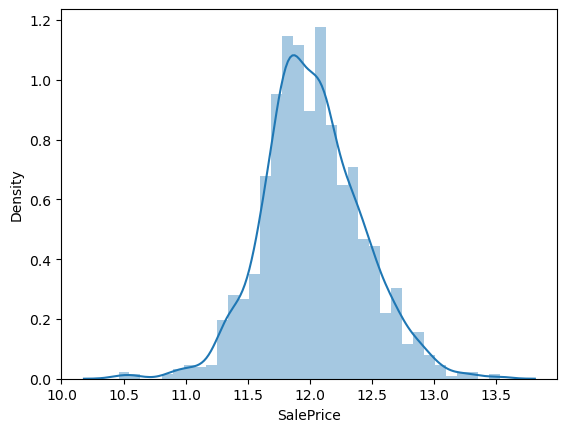

In [72]:
sns.distplot(np.log(df.SalePrice))

In [11]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis=1, inplace=True)

In [12]:
df.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
KitchenAbvGr      4.488397
ScreenPorch       4.122214
EnclosedPorch     3.089872
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
LogOfPrice        0.121335
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
dtype: float64

In [47]:
df.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LogOfPrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.007940,-0.015415,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.221985
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134


<Axes: >

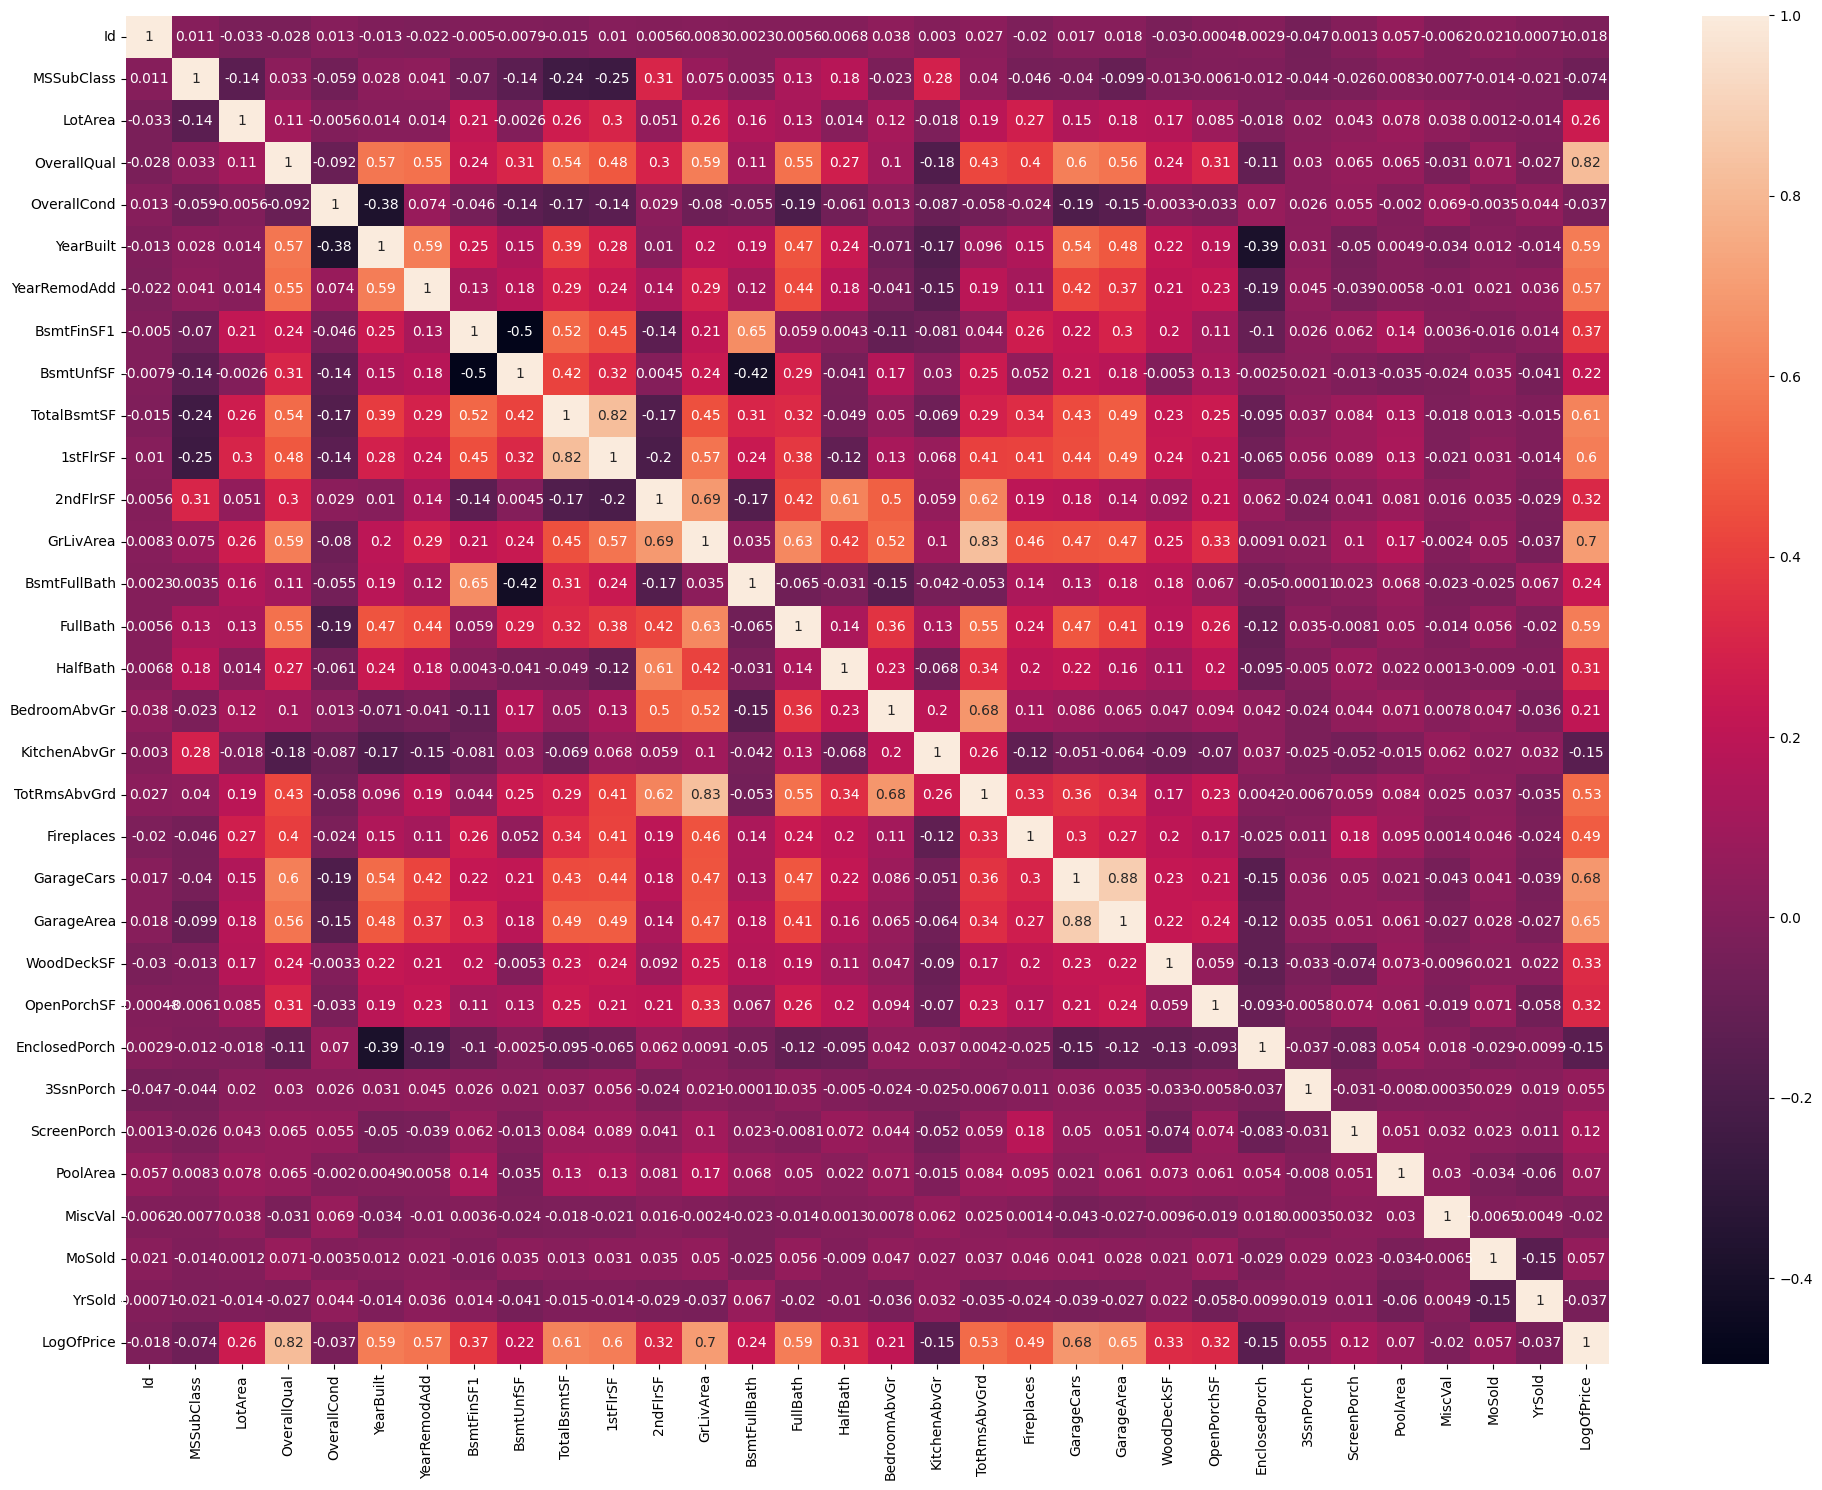

In [159]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=df.corr(),annot=True,annot_kws={'size':10})

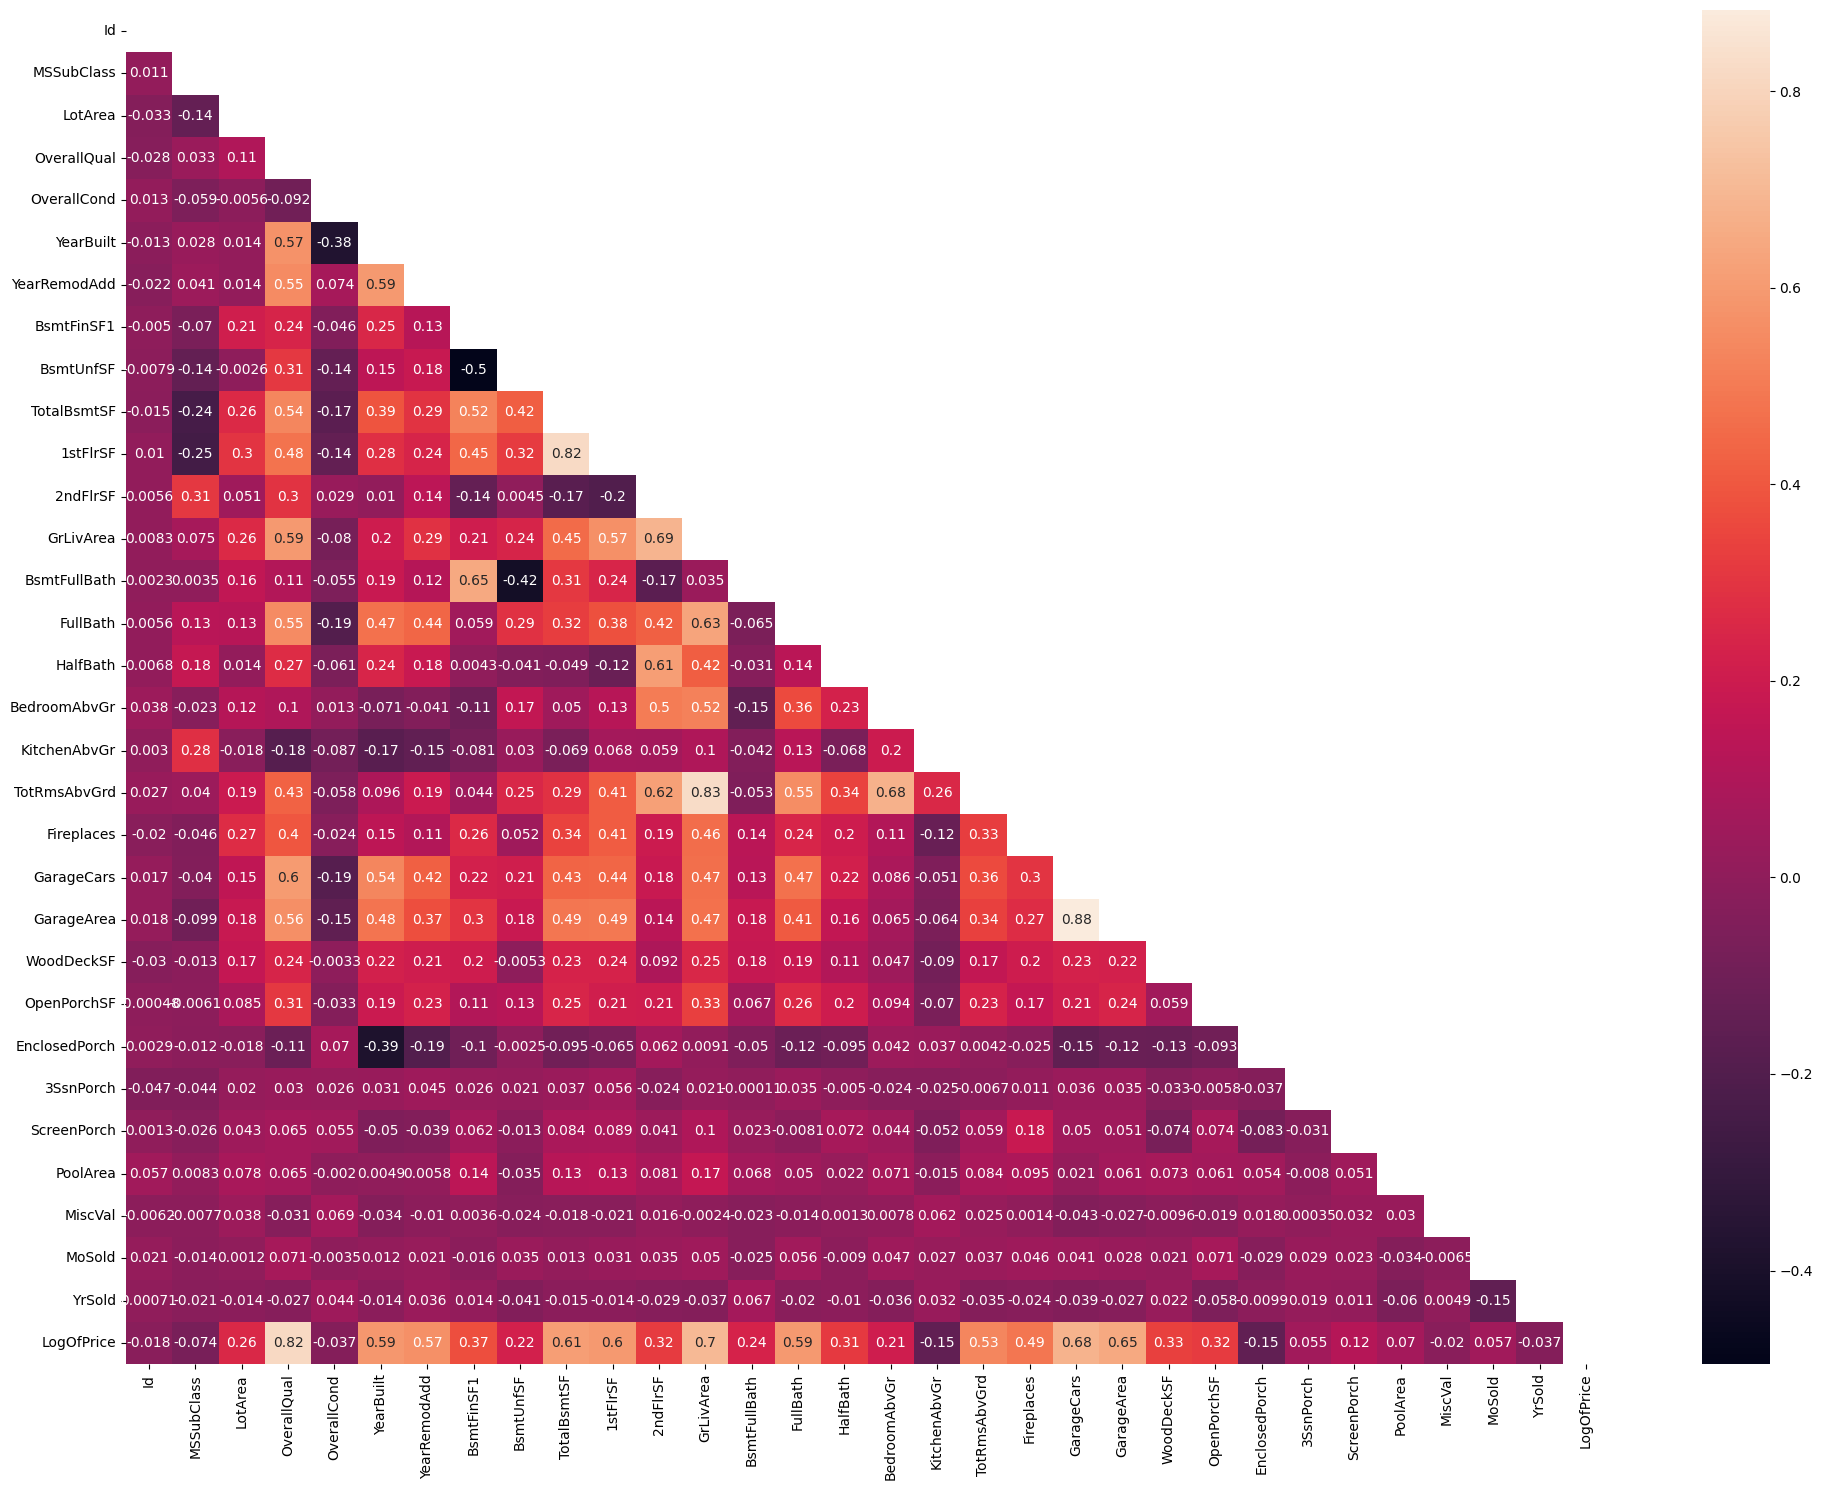

In [94]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(data=df.corr(),annot=True,annot_kws={'size':10},mask=mask)
plt.show()

In [160]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

In [165]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)

In [166]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [171]:
yr_hat1 = lr1.predict(X_test)


In [169]:
# evaluate the algorithm with a test set 
lr_score1 = lr1.score(X_test, y_test)  # train test 
lr_scoretrain = lr1.score(X_train, y_train) 
print("Accuracy of testing data: ", lr_score1)
print("Accuracy of training data: ", lr_scoretrain)

Accuracy of testing data:  0.7307128330903172
Accuracy of training data:  0.886139365586683


<Axes: >

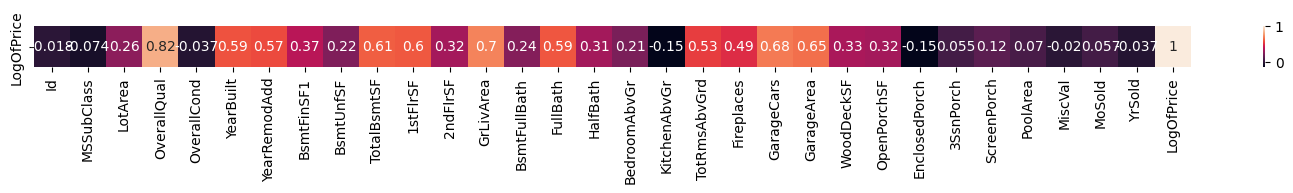

In [46]:
plt.figure(figsize=(15, 2))
sns.heatmap(df.corr().loc[['LogOfPrice'], :], annot=True)

In [34]:
df.shape

(1460, 32)

In [211]:
df.LogOfPrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogOfPrice, Length: 1460, dtype: float64

In [212]:
df['LogOfPrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogOfPrice, Length: 1460, dtype: float64

In [213]:
df[['LogOfPrice']]

,LogOfPrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


gardenarea, garagearea

In [69]:
y = df.LogOfPrice  
X = df[['OverallQual']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [70]:
yr_hat2 = lr2.predict(X_test)
lr_scoretrain=lr2.score(X_train, y_train)
lr_score2 = lr2.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain)
print("Accuracy of Testing: ", lr_score2)


Accuracy of Training:  0.6727295691815836
Accuracy of Testing:  0.6420592890271115


vif- variance inflation factor 

In [78]:
y = df.LogOfPrice  
X = df[['OverallQual','GrLivArea','GarageCars']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [79]:
yr_hat3 = lr3.predict(X_test)
lr_scoretrain3=lr3.score(X_train, y_train)
lr_score3 = lr3.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain3)
print("Accuracy of Testing: ", lr_score3)


Accuracy of Training:  0.7911052855366417
Accuracy of Testing:  0.7240974056299907


In [82]:
y = df.LogOfPrice  
X = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr4 = LinearRegression()
lr4.fit(X_train, y_train)

LinearRegression()

In [83]:
yr_hat4 = lr4.predict(X_test)
lr_scoretrain4 = lr4.score(X_train, y_train)
lr_score4 = lr4.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain4)
print("Accuracy of Testing: ", lr_score4)


Accuracy of Training:  0.8180486212923685
Accuracy of Testing:  0.6397572489569281


In [107]:
y = df.LogOfPrice  
X = df[['OverallQual','GrLivArea','GarageCars','GarageArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr5 = LinearRegression()
lr5.fit(X_train, y_train)

LinearRegression()

In [108]:
yr_hat5 = lr5.predict(X_test)
lr_scoretrain5 = lr5.score(X_train, y_train)
lr_score5 = lr5.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain5)
print("Accuracy of Testing: ", lr_score5)


Accuracy of Training:  0.7922539801108344
Accuracy of Testing:  0.700604375621177


<Axes: >

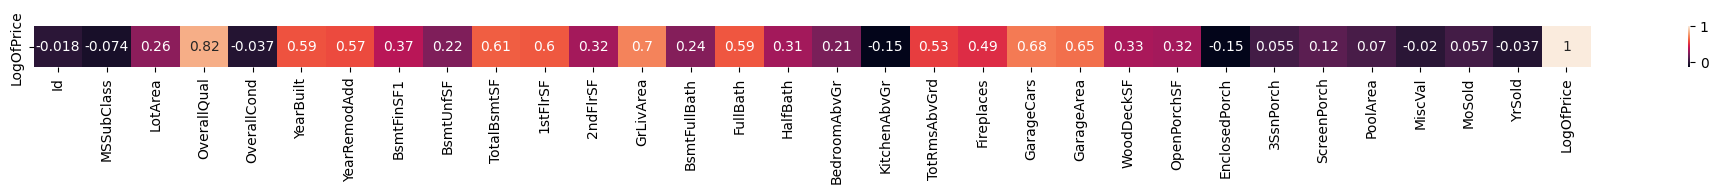

In [115]:
plt.figure(figsize=(20, 2))
sns.heatmap(df.corr().loc[['LogOfPrice'], :], annot=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

In [117]:
y = df.LogOfPrice
X = df[['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','FullBath','TotRmsAbvGrd','GrLivArea','GarageCars','TotalBsmtSF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr6 = LinearRegression()
lr6.fit(X_train, y_train)
yr_hat6 = lr6.predict(X_test)
lr_scoretrain6=lr6.score(X_train, y_train)
lr_score6 = lr6.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain6)
print("Accuracy of Testing: ", lr_score6)

Accuracy of Training:  0.840916967641514
Accuracy of Testing:  0.6810658956655351


In [118]:
y = df.LogOfPrice
X = df[['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','FullBath','TotRmsAbvGrd','GrLivArea','GarageCars']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr7 = LinearRegression()
lr7.fit(X_train, y_train)
yr_hat7 = lr7.predict(X_test)
lr_scoretrain7=lr7.score(X_train, y_train)
lr_score7 = lr7.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain7)
print("Accuracy of Testing: ", lr_score7)

Accuracy of Training:  0.8329651389169983
Accuracy of Testing:  0.7202488931298989


In [194]:
y = df.LogOfPrice
X = df[['TotRmsAbvGrd']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr8 = LinearRegression()
lr8.fit(X_train, y_train)
yr_hat8 = lr8.predict(X_test)
lr_scoretrain8=lr8.score(X_train, y_train)
lr_score8 = lr8.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain8)
print("Accuracy of Testing: ", lr_score8)

Accuracy of Training:  0.31175104716476754
Accuracy of Testing:  0.13868158465351454


In [195]:
y = df.LogOfPrice
X = df[['TotRmsAbvGrd','TotalBsmtSF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr9 = LinearRegression()
lr9.fit(X_train, y_train)
yr_hat9 = lr9.predict(X_test)
lr_scoretrain9=lr9.score(X_train, y_train)
lr_score9 = lr9.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain9)
print("Accuracy of Testing: ", lr_score9)

Accuracy of Training:  0.5820025216183251
Accuracy of Testing:  0.1272856955675622


In [192]:
y = df.LogOfPrice
X = df[['TotalBsmtSF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr10 = LinearRegression()
lr10.fit(X_train, y_train)
yr_hat10 = lr10.predict(X_test)
lr_scoretrain10=lr10.score(X_train, y_train)
lr_score10 = lr10.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain10)
print("Accuracy of Testing: ", lr_score10)

Accuracy of Training:  0.4331497341420393
Accuracy of Testing:  0.02898386777076367


In [144]:
y = df.LogOfPrice
X = df[['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','FullBath','GrLivArea','GarageCars']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr11 = LinearRegression()
lr11.fit(X_train, y_train)
yr_hat11 = lr11.predict(X_test)
lr_scoretrain11 = lr11.score(X_train, y_train)
lr_score11 = lr11.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain11)
print("Accuracy of Testing: ", lr_score11)

Accuracy of Training:  0.832965112324416
Accuracy of Testing:  0.7202723337460109


In [147]:
y = df.LogOfPrice
X = df[['OverallQual','BsmtFinSF1','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','TotRmsAbvGrd','GrLivArea','GarageCars','TotalBsmtSF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr12 = LinearRegression()
lr12.fit(X_train, y_train)
yr_hat12 = lr12.predict(X_test)
lr_scoretrain12=lr12.score(X_train, y_train)
lr_score12 = lr12.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain12)
print("Accuracy of Testing: ", lr_score12)

Accuracy of Training:  0.8598689301076016
Accuracy of Testing:  0.6883061872862444


In [198]:
y = df.LogOfPrice
X = df[['OverallQual','BsmtFinSF1','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','GrLivArea','GarageCars',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr13 = LinearRegression()
lr13.fit(X_train, y_train)
yr_hat13 = lr13.predict(X_test)
lr_scoretrain13=lr13.score(X_train, y_train)
lr_score13 = lr13.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain13)
print("Accuracy of Testing: ", lr_score13)

Accuracy of Training:  0.8549700825902199
Accuracy of Testing:  0.7118619925681422


In [202]:
y = df.LogOfPrice
X = df[['MSSubClass','OverallQual','BsmtFinSF1','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','GrLivArea','GarageCars',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr14 = LinearRegression()
lr14.fit(X_train, y_train)
yr_hat14 = lr14.predict(X_test)
lr_scoretrain14 =lr14.score(X_train, y_train)
lr_score14 = lr14.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain14)
print("Accuracy of Testing: ", lr_score14)

Accuracy of Training:  0.8604182834262758
Accuracy of Testing:  0.7285159632947857


In [209]:
y = df.LogOfPrice
X = df[['3SsnPorch','KitchenAbvGr','MSSubClass','OverallQual','BsmtFinSF1','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','GrLivArea','GarageCars','PoolArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
lr15 = LinearRegression()
lr15.fit(X_train, y_train)
yr_hat15 = lr15.predict(X_test)
lr_scoretrain15=lr15.score(X_train, y_train)
lr_score15 = lr15.score(X_test, y_test)  
print("Accuracy of Training: ", lr_scoretrain15)
print("Accuracy of Testing: ", lr_score15)

Accuracy of Training:  0.8616342259904735
Accuracy of Testing:  0.7338701279463075


In [ ]:
from pycaret.regression import *

In [ ]:
df.drop("Id",axis=1,inplace=True)

In [ ]:
sum(df["YearBuilt"]>=2003)

In [ ]:
s=setup(df,target="SalePrice")

In [ ]:
best = compare_models()

In [ ]:
tune=tune_model(best)

In [ ]:
tune=tune_model(tune)

In [ ]:
evaluate_model(best)

In [ ]:
predict_model(best)

In [ ]:
predictions = predict_model(best, data=df)
predictions.head()

In [ ]:
save_model(best, 'Housepricepredictor')